In [3]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [87]:
attendance_data = pd.read_csv("Desktop/Portfolio/AttendanceProject/attendance_data.csv")
attendance_data['total_home_attendance'] = attendance_data['total_home_attendance'].str.replace(',','').astype(int)
attendance_data['home_avg'] = attendance_data['home_avg'].str.replace(',','').astype(int)
attendance_data['away_avg'] = attendance_data['away_avg'].str.replace(',','').astype(int)
attendance_data['total_avg'] = attendance_data['total_avg'].str.replace(',','').astype(int)

attendance_data.dtypes

rank                       int64
year                       int64
team                      object
city                      object
home_games                 int64
total_home_attendance      int64
home_avg                   int64
away_games                 int64
away_avg                   int64
total_games                int64
total_avg                  int64
Unnamed: 11              float64
Unnamed: 12              float64
Unnamed: 13              float64
dtype: object

In [89]:
attendance_data.head(3)

,rank,year,team,city,home_games,total_home_attendance,home_avg,away_games,away_avg,total_games,total_avg,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,2022,Dodgers,Los Angeles,81,3861408,47671,81,31104,162,39388,NaN,NaN,NaN
1,2,2022,Cardinals,St. Louis,81,3320551,40994,80,27895,161,34485,NaN,NaN,NaN
2,3,2022,Yankees,Bronx,78,3136207,40207,81,30418,159,35220,NaN,NaN,NaN


The (convoluted) figure below shows how team rankings changed in the last 12 years.

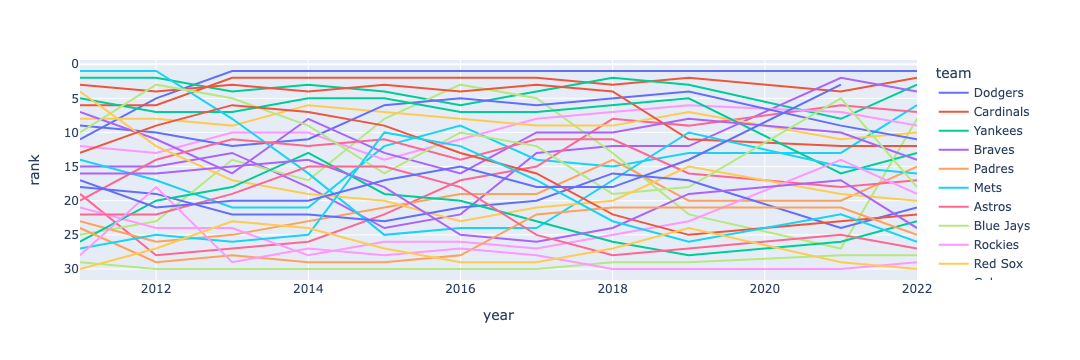

In [26]:
fig = px.line(attendance_data, x='year', y='rank',color='team')
fig.update_yaxes(autorange="reversed")
fig

Below demonstrates the average rank of each team over the last 12 years. The lower the number, the higher the average attendance rank over the last 12 years

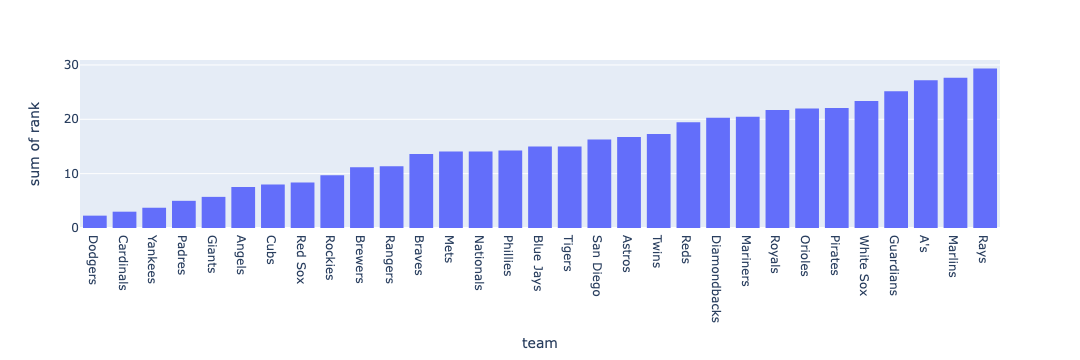

In [90]:
df_grouped = attendance_data.groupby('team').agg({
    'rank':'mean'
})

df_grouped.reset_index(inplace=True)

fig = px.histogram(df_grouped, x='team', y='rank')
fig.update_layout(xaxis = {"categoryorder":"total ascending"})
fig.show()

In [91]:
top_10_attendance = df_grouped.sort_values('rank').head(10)
top_10_attendance

,team,rank
9,Dodgers,2.272727
6,Cardinals,3.000000
30,Yankees,3.727273
17,Padres,5.000000
10,Giants,5.727273
1,Angels,7.545455
7,Cubs,8.000000
22,Red Sox,8.363636
24,Rockies,9.727273
5,Brewers,11.181818


After creating a df with the top ten teams average attendance, we will now mask for these teams and redemonstrate the first figure.

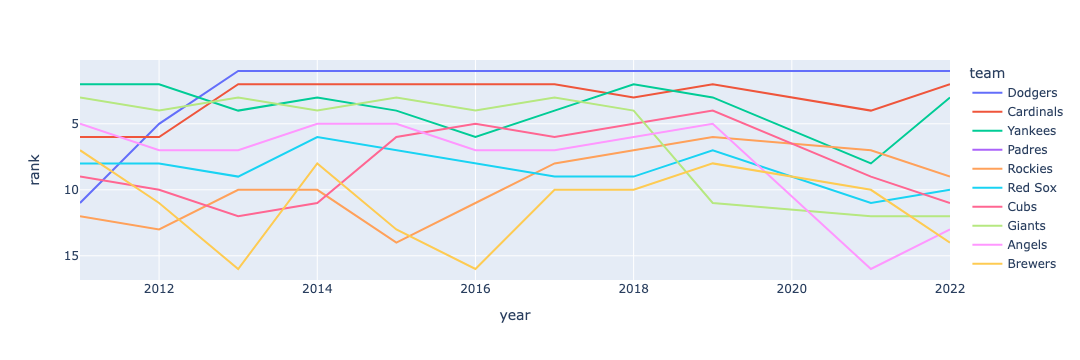

In [92]:
df_sorted = attendance_data[attendance_data['team'].isin(top_10_attendance['team'])]
fig = px.line(df_sorted, x='year', y='rank',color='team')
fig.update_yaxes(autorange="reversed")

In [94]:
top_10_agg = df_sorted.groupby(['team', 'year']).agg({
    'total_home_attendance' : 'sum', 
    'home_avg': 'sum',
    'away_avg': 'sum', 
    'total_avg': 'sum'
})

In [95]:
top_10_means = df_sorted.groupby('team').agg({
    'total_home_attendance' : 'mean', 
    'home_avg': 'mean',
    'away_avg': 'mean', 
    'total_avg': 'mean'
})
#Need to convert column types to ints

In [105]:
top_10_agg.reset_index(inplace=True)
top_10_agg

,index,team,year,total_home_attendance,home_avg,away_avg,total_avg
0,0,Angels,2011,3166321,39090,26125,32608
1,1,Angels,2012,3061770,37799,30831,34315
2,2,Angels,2013,3019505,37277,27588,32432
3,3,Angels,2014,3095935,38221,28174,33229
4,4,Angels,2015,3012765,37194,28958,33076
...,...,...,...,...,...,...,...
95,95,Yankees,2017,3146966,39835,32354,36048
96,96,Yankees,2018,3482855,42998,30685,36880
97,97,Yankees,2019,3304404,41827,30759,36258
98,98,Yankees,2021,1959854,24498,20612,22543


In [106]:
top_10_means.reset_index(inplace=True)
top_10_means

,index,team,total_home_attendance,home_avg,away_avg,total_avg
0,0,Angels,2.854976e+06,35246.181818,27048.545455,31150.272727
1,1,Brewers,2.605277e+06,32197.363636,29394.727273,30801.454545
2,2,Cardinals,3.271533e+06,40418.181818,29739.818182,35090.363636
3,3,Cubs,2.859907e+06,35263.363636,32036.909091,33654.272727
4,4,Dodgers,3.592467e+06,44298.181818,32581.636364,38451.000000
5,5,Giants,3.048279e+06,37679.181818,31762.818182,34721.909091
6,6,Padres,2.991470e+06,36931.000000,29754.000000,33365.000000
7,7,Red Sox,2.800986e+06,34579.454545,29807.545455,32194.000000
8,8,Rockies,2.692959e+06,33401.090909,30010.636364,31704.545455
9,9,Yankees,3.196799e+06,39904.909091,31237.818182,35555.454545


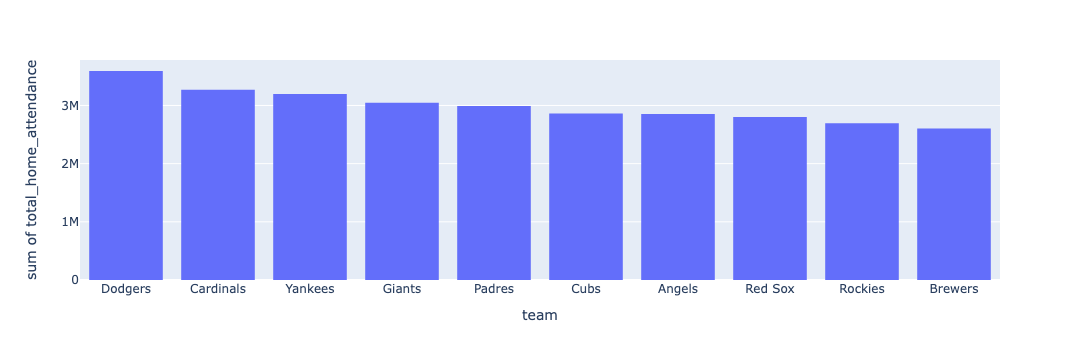

In [107]:
fig = px.histogram(top_10_means, x='team',y='total_home_attendance')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

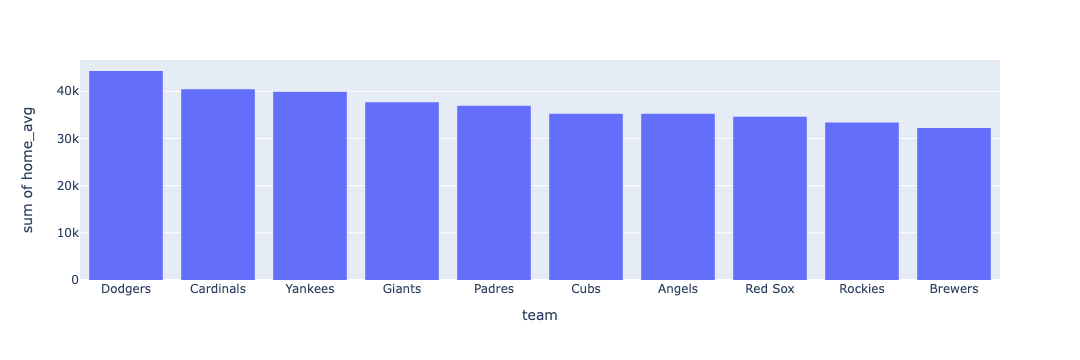

In [109]:
fig = px.histogram(top_10_means, x='team',y='home_avg')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

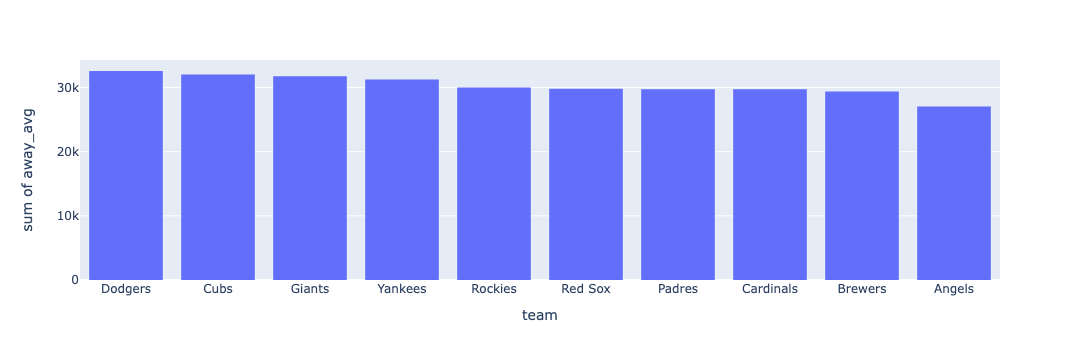

In [110]:
fig = px.histogram(top_10_means, x='team',y='away_avg')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

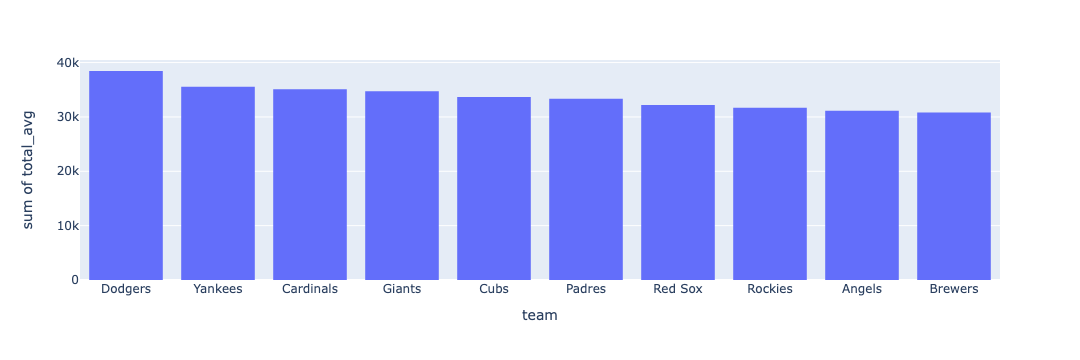

In [111]:
fig = px.histogram(top_10_means, x='team',y='total_avg')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()